# 리그 오브 레전드 챔피언 조합에 따른 승률 분석


#제안서

## 연구 배경

2021년 현재 가장 유명한 e-sports 종목을 뽑자면, riot games의 league of legends(리그오브레전드, 이하 '롤')를 뽑을 수 있을 것이다. 전 세계적으로 대륙 또는 국가 단위로 리그를 운영하고 있고, 분기별로 세계대회가 진행되고 있다. 프로선수 외에도, 수많은 일반 유저들이 즐기고 있는 게임이기도 하다.

유저들이 많아짐에 따라 '어떻게 하면 승리할 수 있는가?'에 대한 유저들 간의 의견 교환이 매우 활발하게 일어났고, 그것이 오늘날의 인게임(경기 내용에서의) 지표들을 바탕으로한 정보들에 대한 높은 수요로 이어지게 되었다. 그 결과, 인게임 통계를 전문적으로 제공해주는 서비스(op.gg, fow.kr 등)와 통계자료를 바탕으로 여러가지 인사이트를 제공하는 크리에이터들(프로관전러PS, 롤박사 해도리 등)이 생겨났다. 또한 프로게임단에서도 기존에 있던 인게임 코치 외에 정보분석관이라는 보직을 새롭게 두는 추세이다.

앞서 언급한 컨텐츠들은 보통 '특정 아이템의 승률', '특정 챔피언(게임에 등장하는 캐릭터)의 승률' 등을 기반으로 정보가 제공되고 있다. 그러나 '챔피언들의 조합'의 측면에서 분석한 정보들은 많이 제공되고 있지 않다. 이미 프로게임 수준에서는 활발한 분석이 진행되고 있을 수는 있겠으나, 일반 유저들에게는 많이 알려져 있지 않으며, 그 중요도도 상대적으로 낮게 인식되고 있다.

이에 따라, riot games에서 제공하는 매치 데이터들을 사용하여 챔피언들의 조합에 따른 승률 분석을 진행해보고자 한다.

##방법



### 1. riot games에서 제공하는 매치 데이터를 수집한다.

riot games에서 제공하는 api를 사용하여 일정 수준 이상(플래티넘 티어 이상 경기)의 매치 데이터를 수집한다.

In [1]:
# import requests
# import json

# raw_match_data = open('raw_match_data.txt', 'w')
# api = "riot_api"

# res = requests.get(api)

# for i in res.text:
#   raw_match_data.write(i)

# raw_match_data.close()

### 2. 매치 데이터를 바탕으로 챔피언의 역할군 분류를 한다.

2021년 기준, 롤은 게임에서 챔피언 당 1개만 구입할 수 있는 '신화 아이템'이 있다. 여러가지 신화 아이템 중 한개만 구입 할 수 있기 때문에, 대부분의 유저들은 자기 챔피언에게 가장 어울리는 신화 아이템을 구매한다.(물론 신화 아이템을 구매하지 않는 경우도 있다. 적절하게 예외처리 한다.)

신화 아이템은 각각 역할군으로 분류되어 있으므로, 어떤 한 챔피언에 대하여 가장 선호도가 높은 신화 아이템을 바탕으로 역할군을 나누면, 유저들이 선호하는 해당 챔피언의 역할군을 알 수 있다.

In [2]:
# 1. raw_match_data로부터 match data를 정제한다.

# 2. 각 매치에 대하여, 매치에 사용된 10명의 챔피언에 대해 각각 사용한 신화 아이템을 카운트한다.

# 3. 각 챔피언에 대하여, 가장 많이 사용한 신화아이템을 기반으로 역할군을 분류한다.

### 3. 챔피언의 스킬을 바탕으로 보유한 능력을 정리한다

이 부분은 크롤링 할 데이터가 없으므로, 154개의 챔피언을 바탕으로 직점 기록한다.

광역하드CC, 단일하드CC, 광역소프트CC, 단일소프트CC, 회복, 보호막, 돌진, 글로벌이동기, 아군버프 등 카테고리를 정하여 정리한다.


In [3]:
# abilities = open('abilities.json)
# abilities.close()

### 4. 매치 데이터를 바탕으로, 사용된 챔피언의 역할군과 능력을 분류하여 정리한다.

```
team example)
team = {
  champions = ["aatrox", "graves", "ahri", "ezreal", "janna"],
  roles = {
    "bruser": 1
    "AD Carry" : 2
    "mage" : 1
    "support" : 1
  }
  abilities = ["multiCC", "knuckback", "blind", etc...]
  }
}
```

### 5. 가장 승률이 높은 조합, 특성 데이터 분석 등을 통해 승리 요인을 분석해본다.

### 6. 플래티넘 이상 게임을 직접 관전하고, 결론과 비교하여본다.

#구현

## 1. 플래티넘 이상의 매치 데이터에서 가장 선호하는 신화 아이템 데이터 수집

기존의 계획은 riot games에서 제공하는 매치데이터를 사용하려고 했으나, 필요한 데이터를 따로 제공하고 있지 않은 상황이다.

lolalytics.com에서 필요한 매치데이터를 제공하고 있으므로, 이 사이트의 데이터를 크롤링 하는것으로 대체한다.

lolalytics.com에서는, 각 티어이상 게임에서의 챔피언별 아이템 선호도 데이터를 제공하고 있다. 이에따라, 필요한 데이터를 BeautifulSoup를 활용하여 크롤링 하였다.

해당 사이트에서는 기본값이 플래티넘 이상 매치데이터 였기 때문에, 따로 티어를 지정할 필요가 없었다.

또한, 현재 패치버전인 11.10버전이 기본값으로 설정되어있어, 따로 패치버전을 지정할 필요도 없었다.



1.244 1.242 0 2.24.409 2.995 1.227.719.794 1.079 1.819 1.079 3.075zm6.108-2.489a3.281 3.281 0 0 0-.592-.05c-.661 0-1.172.247-1.532.742-.314.438-.47.99-.47 1.658v4.406h-1.878l.016-5.752c0-.969-.023-1.85-.07-2.645h1.638l.068 1.607h.052c.198-.552.512-.997.94-1.33.418-.3.871-.449 1.358-.449.174 0 .331.012.47.034v1.78m6.613 1.676c.013-.553-.11-1.03-.365-1.434-.325-.518-.825-.777-1.497-.777-.615 0-1.115.252-1.496.76-.314.403-.5.887-.556 1.45h3.914zm1.792.484c0 .334-.022.616-.069.846h-5.637c.022.83.294 1.463.817 1.901.475.391 1.09.587 1.844.587.834 0 1.596-.133 2.281-.398l.294 1.296c-.8.346-1.745.519-2.835.519-1.312 0-2.342-.384-3.09-1.15-.747-.766-1.123-1.794-1.123-3.084 0-1.267.347-2.32 1.046-3.16.73-.9 1.716-1.348 2.957-1.348 1.219 0 2.142.448 2.769 1.347.497.714.746 1.596.746 2.643zM42.263 8.783c0-.667-.178-1.18-.535-1.536-.357-.356-.877-.535-1.56-.535-.292 0-.54.02-.745.06v4.277c.114.018.322.026.624.026.707 0 1.253-.195 1.638-.585.385-.39.578-.96.578-1.707zm.974-.025c0 1.03-.31 1.805-.93
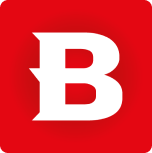

In [7]:
import requests
from bs4 import BeautifulSoup
import ast

LoLWikiUrl = "https://leagueoflegends.fandom.com/wiki/List_of_champions"
champs_Html = requests.get(LoLWikiUrl)

champs_soup = BeautifulSoup(champsHtml.content, 'html.parser')
# print(champsHtml_parse)

champs_table = champs_soup.find("table", {"class": "article-table sticky-header sortable jquery-tablesorter"})

In [5]:
# import requests
# from bs4 import BeautifulSoup
# import ast

champions = ['garen']
popularMythicItemList_itemCode = []

for champ in champions:
  URL = 'https://lolalytics.com/lol/'+champ+'/build/'
  html = requests.get(URL)

  soup = BeautifulSoup(html.content, 'html.parser')
  script_soup = soup.find_all("script")

  script_str = ''
  script_str = script_str.join(script_soup[2])
  script_str = script_str[len("var precache = "):]
  # print(script_str)

  mythicItem_str = script_str[script_str.find("mythicItem")-1:script_str.find("popularItem")-2]
  # print(mythicItem_str)

  mythicItem_list_raw = ast.literal_eval(mythicItem_str[len("\"mythicItem\":"):])
  # print(mythicItem_list_raw)

  mythicItem_list = []
  for item in mythicItem_list_raw:
    mythicItem_list.append(item[0])
  # print(mythicItem_list)

  popularMythicItem = mythicItem_list[0]
  # print(popularMythicItem)

  popularMythicItemList_itemCode.append(popularMythicItem)

print(popularMythicItemList_itemCode)


[6631]
